The state of the direct evaluation approach as of 20.07.2023 at 1550 is the baseline

The baseline cosmology, unless otherwise stated, is model 0 with massless neutrinos.

In [1]:
import numpy as np
import camb
from cassL import camb_interface as ci
from cassL import user_interface as ui
import matplotlib.pyplot as plt

In [2]:
modeli = 0
small_test_omnuh2 = ci.OMNUH2_FLOATS[0]
big_test_omnuh2 = ci.OMNUH2_FLOATS[3]

In [3]:
def bad_spectrum(cosmology, redshifts, fancy_neutrinos,
    k_points, hubble_units):
    """
    This returns the total power spectrum, not just the
    non-neutrino stuff.
    """
    assert isinstance(redshifts, list) or isinstance(redshifts, np.ndarray), \
         "If you want to use a single redshift, you must still nest it in" + \
         " an array."                                                          
                                                                               
    pars = ci.input_cosmology(cosmology, hubble_units)
                                                                               
    if fancy_neutrinos:                                       
        ci.make_neutrinos_fancy(pars, cosmology["nnu_massive"])                 
                                                                               
    ci.apply_universal_output_settings(pars)                          
    
    pars.set_matter_power(redshifts=redshifts, kmax=10.0 / pars.h,
                          nonlinear=False)

    results = camb.get_results(pars)

    sigma12 = results.get_sigmaR(12, hubble_units=False)

    k, z, p = results.get_matter_power_spectrum(
        minkh=1e-4 / pars.h, maxkh=10.0 / pars.h, npoints=k_points,
        var1='delta_tot', var2='delta_tot'
    )

    # De-nest for the single-redshift case:
    if len(p) == 1:
        p = p[0]

    if not hubble_units:
        k *= pars.h
        p /= pars.h ** 3

    return k, z, p, sigma12

In [4]:
# Let's compare the spectra for low omnuh2.
cosm = ci.specify_neutrino_mass(
    ci.cosm.iloc[modeli], small_test_omnuh2, 1)

redshifts = ci.parse_redshifts(modeli)

k, z, correct_pspectrum, s = ci.evaluate_cosmology(
    cosm, redshifts=redshifts,
    fancy_neutrinos=False, k_points = 100000,
    hubble_units=False
)
k, z, incorrect_pspectrum, s = bad_spectrum(
    cosm, redshifts=redshifts,
    fancy_neutrinos=False, k_points = 100000,
    hubble_units=False
)

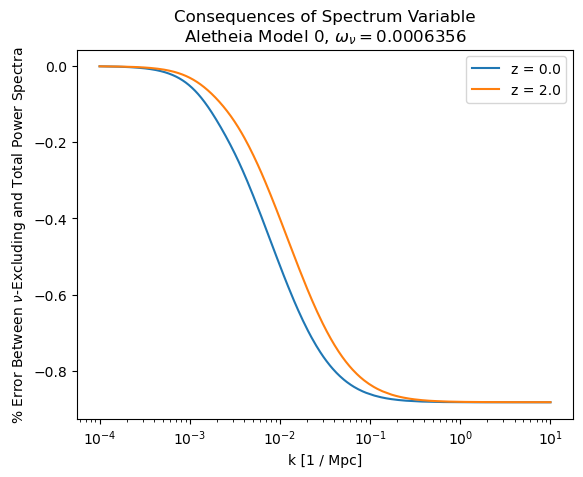

In [5]:
plt.plot(k, ui.percent_error(
    correct_pspectrum[len(redshifts) - 1],
    incorrect_pspectrum[len(redshifts) - 1]),
    label='z = ' + str(redshifts[len(redshifts) - 1]))

plt.plot(k, ui.percent_error(
    correct_pspectrum[0],
    incorrect_pspectrum[0]),
    label='z = ' + str(redshifts[0]))

plt.title("Consequences of Spectrum Variable\nAletheia Model " + \
          str(modeli) + r", $\omega_\nu=$" + str(small_test_omnuh2)) 
plt.ylabel(r"% Error Between $\nu$-Excluding and Total Power Spectra")
plt.xlabel("k [1 / Mpc]")
plt.xscale('log')
plt.legend()

plt.savefig("../plots/line_by_line/spectrum_variable/low_omnuh2.png")

In [6]:
# Let's compare the spectra for low omnuh2.
cosm = ci.specify_neutrino_mass(
    ci.cosm.iloc[modeli], big_test_omnuh2, 1)

redshifts = ci.parse_redshifts(modeli)

k, z, correct_pspectrum, s = ci.evaluate_cosmology(
    cosm, redshifts=redshifts,
    fancy_neutrinos=False, k_points = 100000,
    hubble_units=False
)
k, z, incorrect_pspectrum, s = bad_spectrum(
    cosm, redshifts=redshifts,
    fancy_neutrinos=False, k_points = 100000,
    hubble_units=False
)

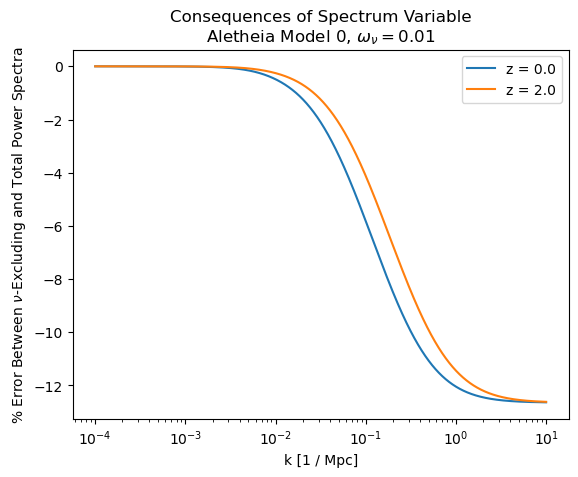

In [7]:
plt.plot(k, ui.percent_error(
    correct_pspectrum[len(redshifts) - 1],
    incorrect_pspectrum[len(redshifts) - 1]),
    label='z = ' + str(redshifts[len(redshifts) - 1]))

plt.plot(k, ui.percent_error(
    correct_pspectrum[0],
    incorrect_pspectrum[0]),
    label='z = ' + str(redshifts[0]))

plt.title("Consequences of Spectrum Variable\nAletheia Model " + \
          str(modeli) + r", $\omega_\nu=$" + str(big_test_omnuh2)) 
plt.ylabel(r"% Error Between $\nu$-Excluding and Total Power Spectra")
plt.xlabel("k [1 / Mpc]")
plt.xscale('log')
plt.legend()

plt.savefig("../plots/line_by_line/spectrum_variable/high_omnuh2.png")

I need a theoretical discussion for these results! It will look really lame if I just say "this is what it looks like when this line is not set correctly."

As we can see, whenever massive neutrinos are present, the total power spectrum consistently underestimates the neutrino-excluding power spectrum, with the discrepancy growing towards smaller scales.

Ideas:
    
* The more stuff in the Universe, the bigger the power spectrum? That
    can't be--why should the total then UNDERestimate the true?